In [1]:
import Windfield_Env
import numpy as np

In [2]:
a=Windfield_Env.WindField(size=7)

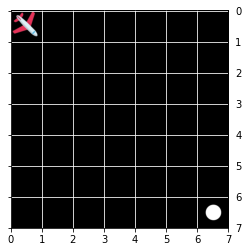

In [3]:
a.render()

In [4]:
wind_field=a.generate_uniform_windfield()

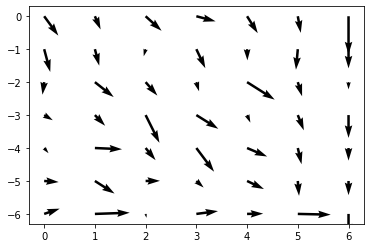

In [5]:
a.plot_windfield(wind_field)

[(1, 0, 3), -5.106056030498625, False]


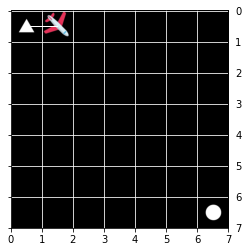

In [6]:
print(a.step("SE"))
a.render()

[(2, 0, 3), 4.283316928887842, False]


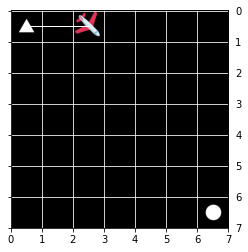

In [7]:
print(a.step("SE"))
a.render()

[(3, 0, 3), -0.2769098096214622, False]


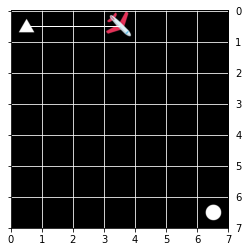

In [8]:
print(a.step("SE"))
a.render()

[(4, 0, 3), -1.3280252046837353, False]


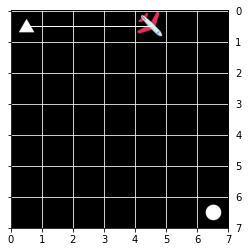

In [9]:
print(a.step("SE"))
a.render()

[(5, 0, 3), 0.497205182688088, False]


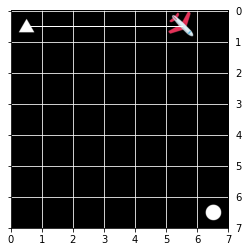

In [10]:
print(a.step("SE"))
a.render()

[(6, 0, 3), 1.9766469942201004, False]


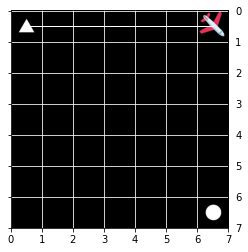

In [11]:
print(a.step("SE"))
a.render()

[(5, 1, 3), -3.1811172936958205, False]


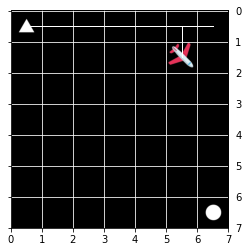

In [13]:
print(a.step("SE"))
a.render()

[(6, 0, 3), 1.9766469942201004, False]


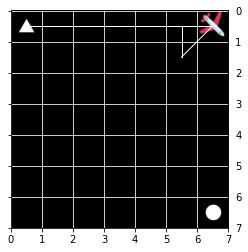

In [14]:
print(a.step("SE"))
a.render()

[(5, 0, 3), 0.497205182688088, False]


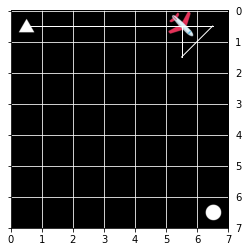

In [15]:
print(a.step("SE"))
a.render()

[(6, 0, 3), 1.9766469942201004, False]


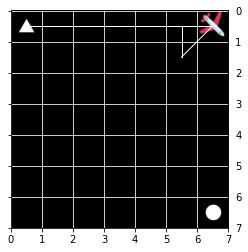

In [16]:
print(a.step("SE"))
a.render()

[(5, 0, 3), 0.497205182688088, False]


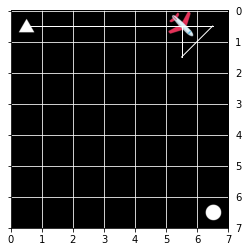

In [17]:
print(a.step("SE"))
a.render()